# Intermediate importing data

## Importing flat files from the web

In [2]:
from urllib.request import urlretrieve
import pandas as pd

url = 'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally
urlretrieve(url, 'files/winequality-red.csv')

# Read file into a DataFrame and print its head
df = pd.read_csv('files/winequality-red.csv', sep=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

Opening and reading flat files from the web

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

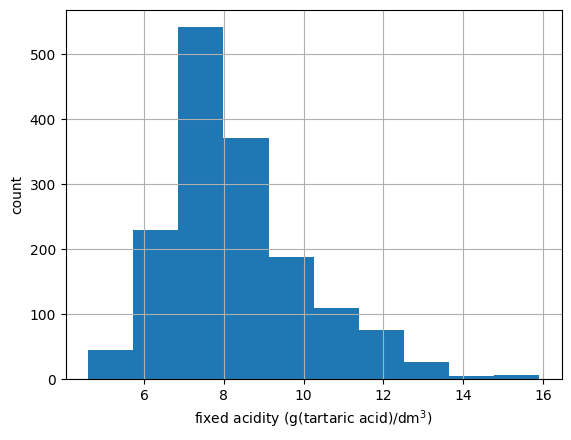

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

url = 'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame: df
df = pd.read_csv(url, sep=';')

print(df.head())

df.iloc[:, 0].hist()
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()

Importing non-flat files from the web

In [5]:
import pandas as pd

url = 'https://assets.datacamp.com/course/importing_data_into_r/latitude.xls'

xls = pd.read_excel(url, sheet_name=None)

print(xls.keys())

print(xls['1700'].head())

dict_keys(['1700', '1900'])
                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


## HTTP requests to import files from the web

### Performing HTTP requests in Python using urllib

In [6]:
from urllib.request import urlopen, Request

url = "https://campus.datacamp.com/courses/1606/4135?ex=2"

request = Request(url)

response = urlopen(request)

print(type(response))

response.close()

<class 'http.client.HTTPResponse'>


## Scraping the web in Python

### BeautifulSoup
* Parse and extract structured data from HTML
* Make tag soup beautiful and extract information

#### Turning a webpage into data using BeautifulSoup

* Getting the text

In [10]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.python.org/~guido/'
r = requests.get(url)

html_doc = r.text
soup = BeautifulSoup(html_doc)

guido_title = soup.title
print(guido_title)

guido_text = soup.text
print(guido_text)

<title>Guido's Personal Home Page</title>


Guido's Personal Home Page





Guido van Rossum - Personal Home Page


"Gawky and proud of it."
Who I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.

I am currently a Distinguished Engineer at Microsoft.
I have worked for Dropbox, Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me
You can send email for me to guido (at) python.org.
I read everything sent there, but I receive too much email to respond
to everything.

My Name
My name often poses difficulties for Americans.

Pronunciation: in Dutch, the "G" in Guido is a hard G,
pronounced roughly like the "ch" in Scottish "l

* Getting the hyperlinks

In [11]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.python.org/~guido/'
r = requests.get(url)

html_doc = r.text
soup = BeautifulSoup(html_doc)

print(soup.title)

a_tags = soup.find_all('a')

for link in a_tags:
    print(link.get('href'))

<title>Guido's Personal Home Page</title>
pics.html
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
images/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
Resume.html
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif


## Introduction to APIs and JSONs

### APIs
* Application Programming Interface
* Protocols and routines
  * Building and interacting with software applications

### JSON
* JavaScript Object Notation
* Real-time server-to-browser communication
* Douglas Crockford
* Human readable

Loading and exploring a JSON

In [16]:
import json

# Load JSON: json_data
with open("files/a_movie.json") as json_file:
    json_data = json.load(json_file)

print(json_data.keys())

# Print each key-value pair in json_data
# for k in json_data.keys():
    # print(k + ': ', json_data[k])


dict_keys(['Ratings', 'Country', 'imdbVotes', 'Rated', 'Plot', 'Genre', 'Response', 'Released', 'Language', 'DVD', 'Poster', 'Production', 'Director', 'Title', 'imdbRating', 'Writer', 'Year', 'Metascore', 'Type', 'Runtime', 'Website', 'imdbID', 'Actors', 'Awards', 'BoxOffice'])


#### What is an API?
* Set of protocols and routines
* Bunch of code
  * Allows two software programs to communicate with each other

In [17]:
import os
import requests
from dotenv import load_dotenv

load_dotenv()

apikey = os.getenv('OMDBAPIKEY')

url = f'http://www.omdbapi.com/?apikey={apikey}&t=social+network'

r = requests.get(url)
print(r.text)

{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin, Ben Mezrich","Actors":"Jesse Eisenberg, Andrew Garfield, Justin Timberlake","Plot":"As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"United States","Awards":"Won 3 Oscars. 173 wins & 186 nominations total","Poster":"https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.8/10"},{"Source":"Rotten Tomatoes","Value":"96%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.8","imdbVotes":"699,615","imdbID":"tt1285016","Type":"movie","DV

Decoding the JSON

In [19]:
import os
import requests
from dotenv import load_dotenv

load_dotenv()

apikey = os.getenv('OMDBAPIKEY')

url = f'http://www.omdbapi.com/?apikey={apikey}&t=social+network'

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

for k in json_data.keys():
    print(k + ': ', json_data[k])

Title:  The Social Network
Year:  2010
Rated:  PG-13
Released:  01 Oct 2010
Runtime:  120 min
Genre:  Biography, Drama
Director:  David Fincher
Writer:  Aaron Sorkin, Ben Mezrich
Actors:  Jesse Eisenberg, Andrew Garfield, Justin Timberlake
Plot:  As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.
Language:  English, French
Country:  United States
Awards:  Won 3 Oscars. 173 wins & 186 nominations total
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore:  95
imdbRating:  7.8
imdbVotes:  699,615
imdbID:  tt1285016
Type:  movie
DVD:  11 Jan 2011
BoxOffice:  $

### The Twitter API and Authentication

#### `Tweepy` library

Using Stream

In [56]:
import os
import json

from dotenv import load_dotenv
import tweepy

load_dotenv()

bearer_token = os.getenv('TWITTERBEARERTOKEN')

client = tweepy.Client(bearer_token=bearer_token)

# # Get tweets that contain the hashtag #python
# # -is:retweet means I don't want retweets
# # lang:en is asking for the tweets to be in english
query = 'python OR java OR node OR javascript -is:retweet lang:en'

file_name = 'files/tweets.txt'
tweet_fields = [
    'id', 'text', 'created_at', 'lang',
]

with open(file_name, 'w') as filehandle:
    for tweet in tweepy.Paginator(client.search_recent_tweets, query=query, tweet_fields=tweet_fields, max_results=100).flatten(limit=1000):
        filehandle.write('%s\n' % json.dumps(tweet.data))

Loading and exploring Twitter data

In [57]:
import json

tweets_data_path = 'files/tweets.txt'
tweets_file = open(tweets_data_path, "r")

tweets_data = []
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

tweets_file.close()

print(tweets_data[0].keys())

dict_keys(['id', 'created_at', 'lang', 'edit_history_tweet_ids', 'text'])


Twitter data to DataFrame

In [71]:
import pandas as pd

df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

print(df.head())

                                                text lang
0  RT @hbouammar: Complex numbers in #ML. Amazing...   en
1  RT @moe_gov_sa: انطلاق التسجيل في مبادرة #تطوع...   ar
2  🎉 #JavaScript features in ES2019:\n\n➡️ Array#...   en
3  RT @tanishka__yadav: Web Dev resources you can...   en
4  Casual que en mi empresa estamos comenzando un...   es


Analyzing Twitter data

In [75]:
import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

# Initialize dict to store tweet counts
language_count = {}
for language in ['python', 'java', 'node', 'javascript']:
    language_count[language] = 0

# Iterate through the DataFrame and count the number
# of tweets for each language
for index, row in df.iterrows():
    for language in ['python', 'java', 'node', 'javascript']:
        if word_in_text(language, row['text']):
            language_count[language] += 1

language_df = pd.DataFrame(list(language_count.items()), columns=['language', 'count'])
print(language_df.head())

     language  count
0      python    200
1        java    165
2        node     67
3  javascript     86


Plotting your Twitter data

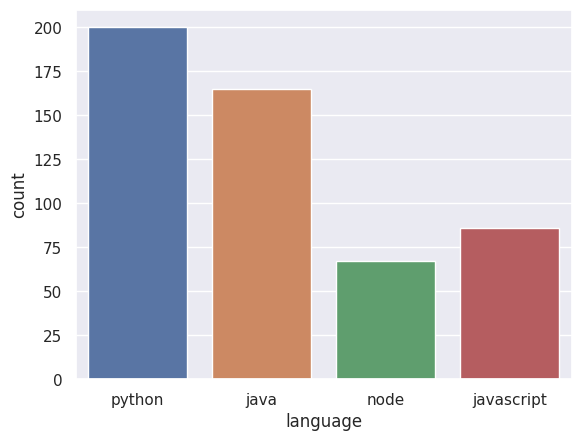

In [76]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(color_codes=True)

sns.barplot(x = 'language', y = 'count', data = language_df)
plt.show()
